In [12]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

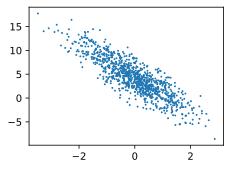

In [13]:
# 生成数据集
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
# print(features,labels)
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

In [14]:
# 读取数据集
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.4489, -0.2866],
        [ 1.8206,  0.1984],
        [-0.3156, -0.1732],
        [ 0.8707,  0.3235],
        [-0.8568, -1.1100],
        [-1.3487,  1.7113],
        [ 1.9620,  0.8244],
        [-0.0735, -1.5269],
        [-0.8819,  0.0793],
        [ 0.9056, -0.0926]]) 
 tensor([[ 8.0753],
        [ 7.1576],
        [ 4.1505],
        [ 4.8506],
        [ 6.2551],
        [-4.2963],
        [ 5.3197],
        [ 9.2574],
        [ 2.1906],
        [ 6.3240]])


In [15]:
# 初始化模型参数
# w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
w = torch.zeros((2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
print(w,b)
def f(X,w,b):
    '''定义模型'''
    return torch.matmul(X,w)+b

def squared_loss(y_hat,y):
    '''定义损失函数'''
    return (y_hat - y.reshape(y_hat.shape))**2 /2

def sgd(params,lr,batch_size):
    '''定义优化算法:小批量随机梯度下降'''
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad / batch_size 
            param.grad.zero_() # 防止梯度累积
    


tensor([[0.],
        [0.]], requires_grad=True) tensor([0.], requires_grad=True)


In [16]:
lr = 0.03
num_epochs = 3
net = f
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

y_hat: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)
y: tensor([[ 6.4327],
        [ 3.7800],
        [-8.5851],
        [ 5.9257],
        [11.7646],
        [ 4.6394],
        [ 3.9960],
        [ 2.2791],
        [ 5.5194],
        [ 9.7804]])
y_hat: tensor([[-0.0795],
        [ 0.0173],
        [ 0.1296],
        [ 0.5437],
        [ 0.1180],
        [-0.2620],
        [ 0.3673],
        [ 0.6981],
        [ 0.1941],
        [ 0.6012]], grad_fn=<AddBackward0>)
y: tensor([[ 0.1169],
        [ 1.9183],
        [ 4.0362],
        [11.6906],
        [ 3.8340],
        [-3.2142],
        [ 8.5702],
        [14.4543],
        [ 5.2189],
        [12.8680]])
y_hat: tensor([[-0.5270],
        [ 0.6427],
        [ 0.4432],
        [ 0.0923],
        [ 0.6880],
        [ 1.5557],
        [ 0.2679],
        [ 0.4066],
        [ 0.6472],
        [ 0.0735]], grad_fn=<AddBackward

## Test

### T1
当权重初始化为零时，每个神经元的输出都是相同的，这意味着每个神经元学习到的特征也是相同的，这样会失去神经网络的优势(即可学习到不同特征的能力)<br>

### T2.假设试图为电压和电流的关系建立一个模型。自动微分可以用来学习模型的参数吗?

根据电压(U)与电流(I)的关系(U=I*R)，构建模型：$\mathit{U} = \mathbf w^\top\mathit{I} + b$<br>
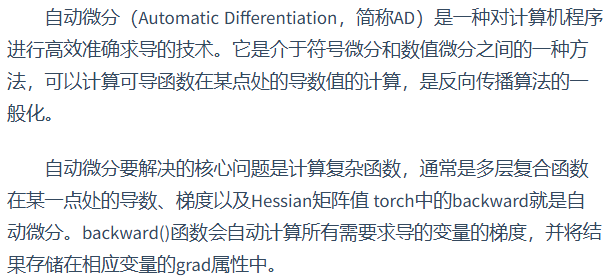


In [17]:
# test 2
x = torch.randn(100, 1)
y = 30 * x

model = torch.nn.Linear(1,1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

# 训练网络
for epoch in range(100):
    # 前向传播
    y_pred = model(x)

    # 计算损失
    loss = criterion(y_pred,y)

    # 优化

    optimizer.zero_grad()
    loss.backward() 
    optimizer.step()

print('w:',model.weight)
print('b:',model.bias)

w: Parameter containing:
tensor([[25.7372]], requires_grad=True)
b: Parameter containing:
tensor([0.8580], requires_grad=True)


### T3.能基于普朗克定律使用光谱能量密度来确定物体的温度吗？
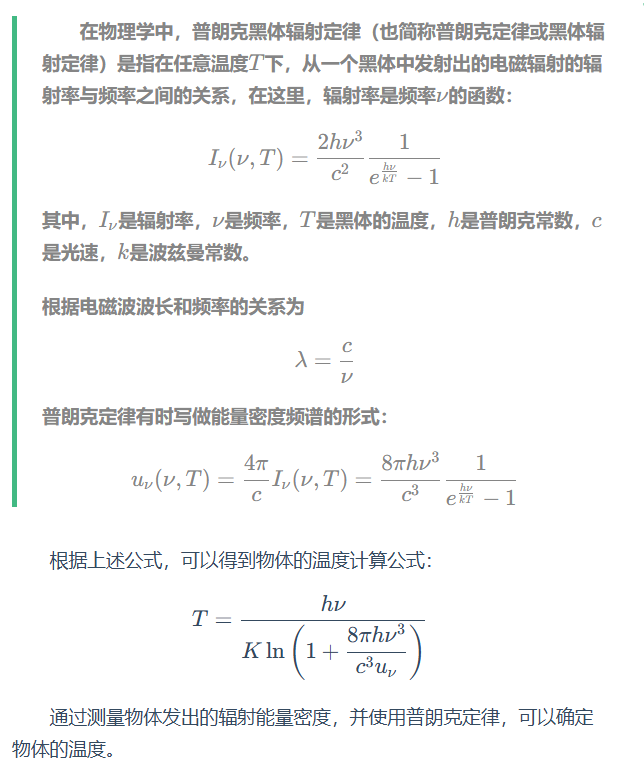
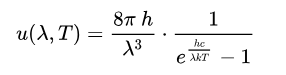

### T4 计算二阶导数时可能会遇到什么问题？这些问题可以如何解决？
* 数值不稳定性问题：该问题可以通过使用更高精度的数据类型（例如双精度浮点数）或通过使用数值稳定性技巧（例如中心差分）来解决。<br>
中心差分是一种常用的数值稳定性技巧，它可以用于计算函数在某个点处的导数。具体来说，中心差分可以通过以下公式计算：<br>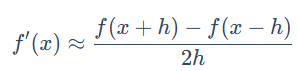
* 一阶导数的计算图保存问题：使用create_graph和retain_graph参数

In [18]:
# test 4举例说明

x = torch.randn((2),requires_grad=True)
print(x)
y = x**3

# 一阶导数
dy = torch.autograd.grad(y,x,grad_outputs=torch.ones(x.shape), 
                         retain_graph=True, create_graph=True)

# 二阶导数
dy2 = torch.autograd.grad(dy,x,grad_outputs=torch.ones(x.shape))
print(dy,dy2)
dy[0]==3*x**2,dy2[0]==6*x

tensor([0.9101, 0.3669], requires_grad=True)
(tensor([2.4846, 0.4039], grad_fn=<MulBackward0>),) (tensor([5.4604, 2.2017]),)


(tensor([True, True]), tensor([True, True]))

### T5 为什么在squared_loss函数中需要使用reshape函数？
* 为了保证y和y_hat形状相同，避免广播机制可能带来的错误结果

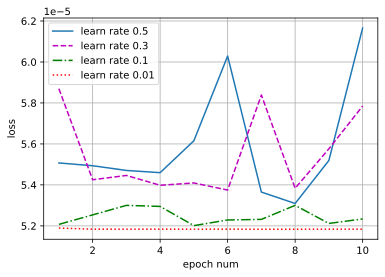

In [20]:
# test 6
import torch
import random
import numpy as np
from d2l import torch as d2l

# 生成数据集
def gen_data(w,b,num_samples):
    X = torch.normal(0,1,(num_samples,len(w)))
    y = torch.matmul(X,w) + b
    # 加上随机噪声
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = gen_data(true_w,true_b,1000)


# 读取数据集
def data_iter(batch_size,features,labels):
    num_samples = len(features)
    indices = list(range(num_samples))
    random.shuffle(indices)
    for i in range(0,num_samples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size,num_samples)]
        )
        yield features[batch_indices], labels[batch_indices]


# 初始化参数
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

lrs = [0.5, 0.3, 0.1, 0.01]
num_epochs = 10
net = linreg
loss = squared_loss

batch_size = 10

all_lrs = []
for lr in lrs:
    train_lrs = []
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, features, labels):
            l = loss(net(X, w, b), y)  # X和y的小批量损失
            # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
            # 并以此计算关于[w,b]的梯度
            l.sum().backward()
            sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
        with torch.no_grad():
            train_l = loss(net(features, w, b), labels)
            train_lrs.append(float(train_l.mean()))
    all_lrs.append(train_lrs)


epochs = np.arange(1, num_epochs+1)
d2l.plot(epochs, all_lrs, xlabel='epoch num', ylabel='loss', 
         legend=[f'learn rate {lr}' for lr in lrs],
         figsize=(6, 4))

'''
* 学习率过大前期损失值下降快，但是后面不容易收敛
* 学习率太小，损失函数下降慢
'''



### T7 如果样本个数不能被批量大小整除，data_iter函数的行为会有什么变化？
* 如果样本个数不能被批量大小整除，则在最后一个迭代周期中，最后一批次可能包含少于批量大小个样本。在这种情况下，我们只需忽略该批次中多余的样本即可。例如，1000个总样本，batch_size=3，那么最后1个样本会被舍去。